Required imports:

In [11]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.stats import zscore
import seaborn as sns

Reading the data
Renaming the columns to more comfortable names

In [12]:
dataset= pd.read_csv("../data/Kaggle.csv")
new_datas=dataset[[
    'Id','Internet users percentage of population 2014','Carbon dioxide emissions per capita 2011 Tones','Domestic food price level 2009 2014 index','Electrification rate or population','Gender Inequality Index 2014','Gross domestic product GDP percapta','Homicide rate per 100k people 2008-2012','Mean years of schooling - Years','Prison population per 100k people','Human Development Index HDI-2014']]
final_set=new_datas.rename(columns={'Id':'Country_name','Internet users percentage of population 2014':'Internet_user_percentage','Carbon dioxide emissions per capita 2011 Tones':'C02_emission_per_capita','Domestic food price level 2009 2014 index':'Food_price_level','Electrification rate or population':'Electrification_rate','Gender Inequality Index 2014':'Gender_inequality_index','Gross domestic product GDP percapta':'GDP_per_capita','Homicide rate per 100k people 2008-2012':'Homicide_rate','Mean years of schooling - Years':'Mean_schooling_years','Prison population per 100k people':'Prisoner_rate','Human Development Index HDI-2014':'Human_development_index'})


Selecting the numeric columns and applying z-score normalization

In [13]:
final_numeric=final_set[['Internet_user_percentage', 'C02_emission_per_capita',
       'Food_price_level', 'Electrification_rate', 'Gender_inequality_index',
       'GDP_per_capita', 'Homicide_rate', 'Mean_schooling_years',
       'Prisoner_rate', 'Human_development_index']]
normalized_set=final_numeric.apply(zscore)

Elbow method: plotting the inertia for different number of clusters
Optimum number of clusters is 6

In [ ]:
wcss=[]
for i in range(1,21):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(normalized_set)
    wcss.append(kmeans.inertia_)

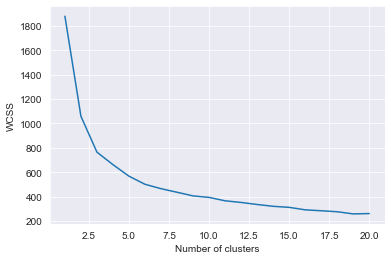

In [22]:
plt.plot(range(1, 21), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Checking the correlation heatmap for features, there seems to be nothing wrong.
Some features have high correlation numerically, but they do not correlate logically.

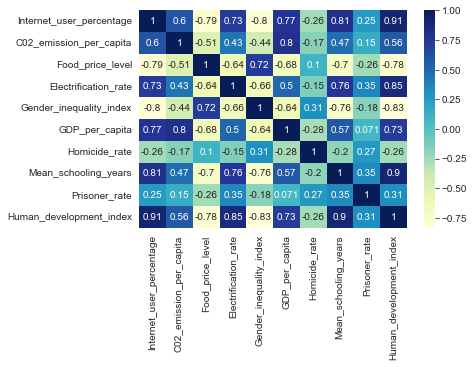

In [15]:
sns.heatmap(normalized_set.corr(), annot=True,cmap="YlGnBu")
plt.show()

Creating the KMeans model for 6 clusters and fitting the data

In [16]:
kmeans=KMeans(n_clusters=6,random_state=0)
kmeans.fit(normalized_set)

C:\Users\asafk\miniconda3\envs\datascience\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=6, random_state=0)

Plotting various variances for different number of components
2 components are needed for 2-D scatter plot, which has 0.82828044 variance ratio

Explained variance ratio:  [0.60405811 0.13642786 0.08779447 0.05765684 0.03709566 0.02472371
 0.02048998 0.01679412 0.01134649 0.00361277]


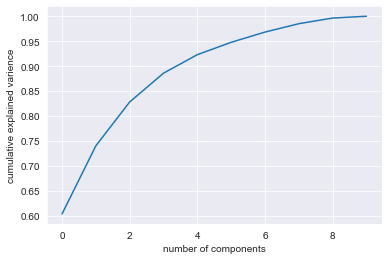

In [17]:
pca_test=PCA(n_components=10,whiten=True)
pca_test.fit(normalized_set)
normalized_set_pca=pca_test.fit_transform(normalized_set)
print("Explained variance ratio: ", pca_test.explained_variance_ratio_)
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel("number of components")
plt.ylabel("cumulative explained varience")
plt.show()

Creating a PCA for 2 components and showing the variance ratios

In [18]:
pca=PCA(n_components=2,whiten=True)
pca.fit(normalized_set)
normalized_set_pca=pca.fit_transform(normalized_set)
print("Explained variance ratio: ", pca.explained_variance_ratio_)

Explained variance ratio:  [0.60405811 0.13642786]


Giving column names to the 2-D PCA dataframe
Creating the 1-D series of cluster labels

In [19]:
final_pca=pd.DataFrame(data=normalized_set_pca, columns=("x_loc","y_loc"))
labels=pd.Series(data=kmeans.labels_)

Plotting the 2-D graph with cluster colors

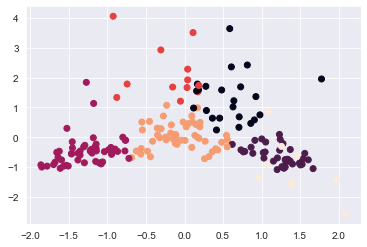

In [20]:
plt.scatter(x=final_pca["x_loc"],y=final_pca["y_loc"],c=labels)
plt.show()